Benchmark functions implemented successfully!
Function 1: Rastrigin Function
  Domain: [(-5.12, 5.12), (-5.12, 5.12)]
  Global minimum: f(0, 0) = 0

Function 2: Ackley Function
  Domain: [(-32.768, 32.768), (-32.768, 32.768)]
  Global minimum: f(0, 0) = 0
Generating function visualizations...

Visualizing Rastrigin Function:


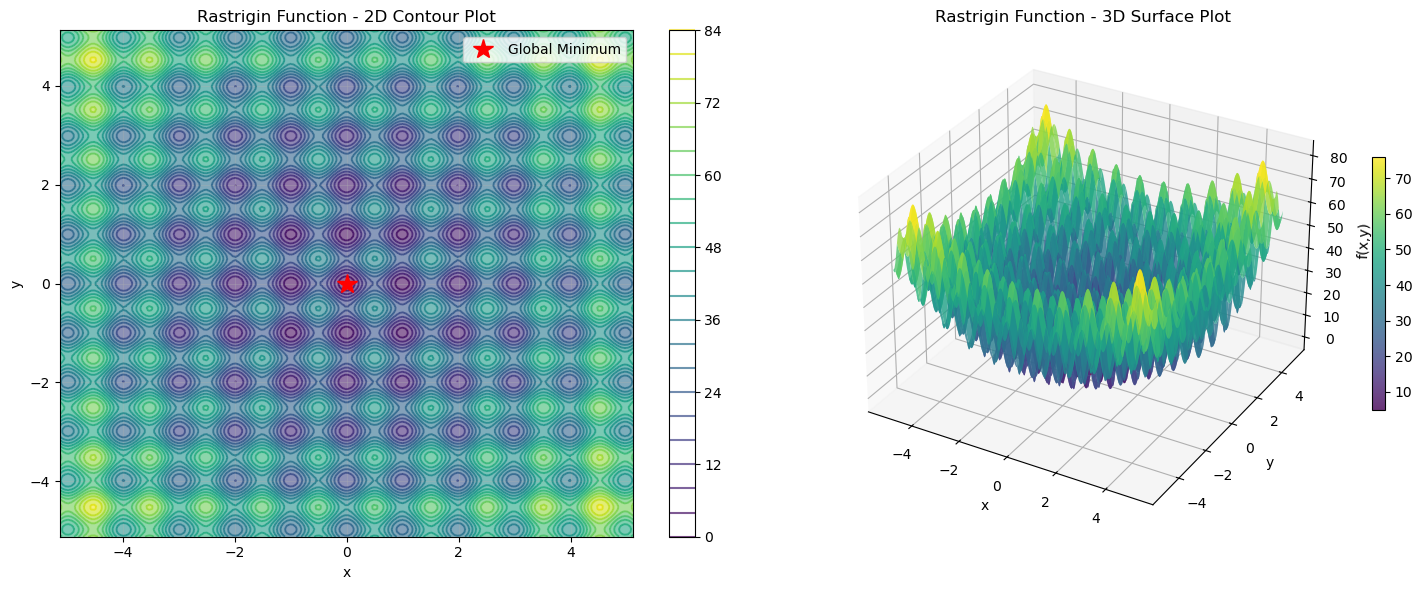


Visualizing Ackley Function:


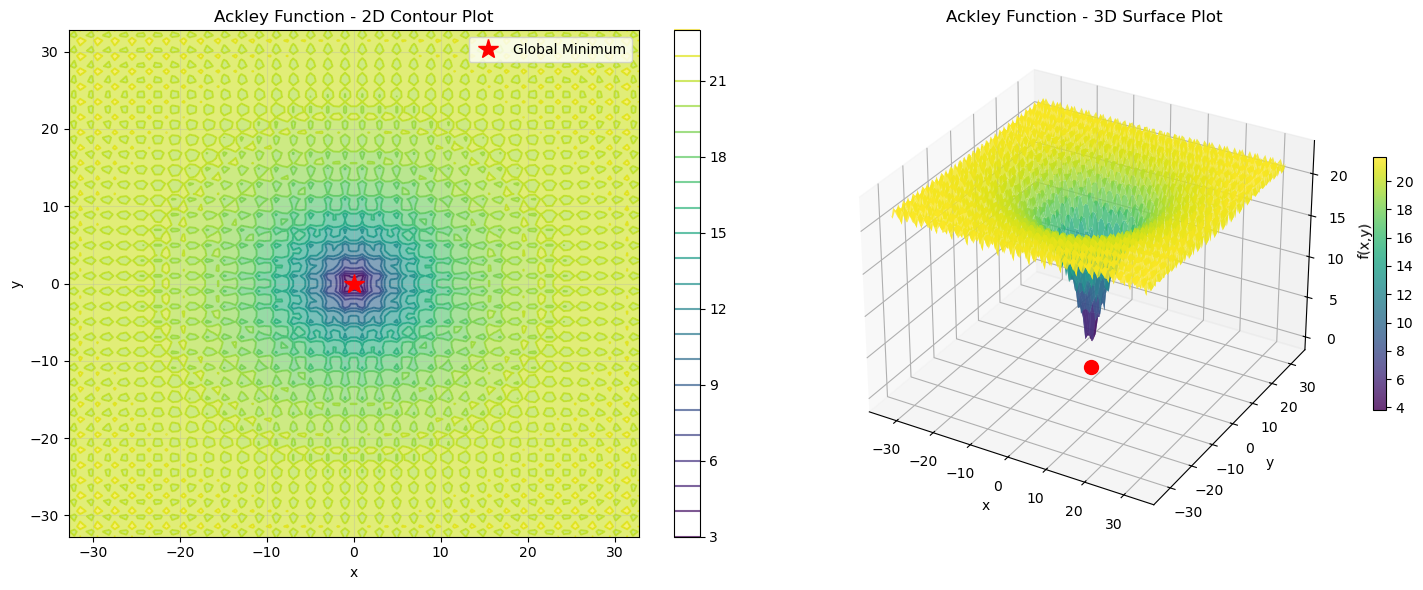

Genetic Algorithm implementation completed!
🧪 Starting comprehensive experiments...
Configurations per function: 8
Runs per configuration: 30
Total runs per function: 120

Testing Rastrigin Function...
  Configuration: binary_one_point
    Run 10/30
    Run 20/30
    Run 30/30
    Results: Mean=1.032975, Std=1.034643, Best=0.000000
  Configuration: binary_two_point
    Run 10/30
    Run 20/30
    Run 30/30
    Results: Mean=1.202108, Std=1.260003, Best=0.000000
  Configuration: real_arithmetic
    Run 10/30
    Run 20/30
    Run 30/30
    Results: Mean=0.049755, Std=0.167441, Best=0.000000
  Configuration: real_blx_alpha
    Run 10/30
    Run 20/30
    Run 30/30
    Results: Mean=0.204384, Std=0.395803, Best=0.000000
Testing Ackley Function...
  Configuration: binary_one_point
    Run 10/30
    Run 20/30
    Run 30/30
    Results: Mean=0.345190, Std=0.877520, Best=0.000125
  Configuration: binary_two_point
    Run 10/30
    Run 20/30
    Run 30/30
    Results: Mean=0.258105, Std=0.7739

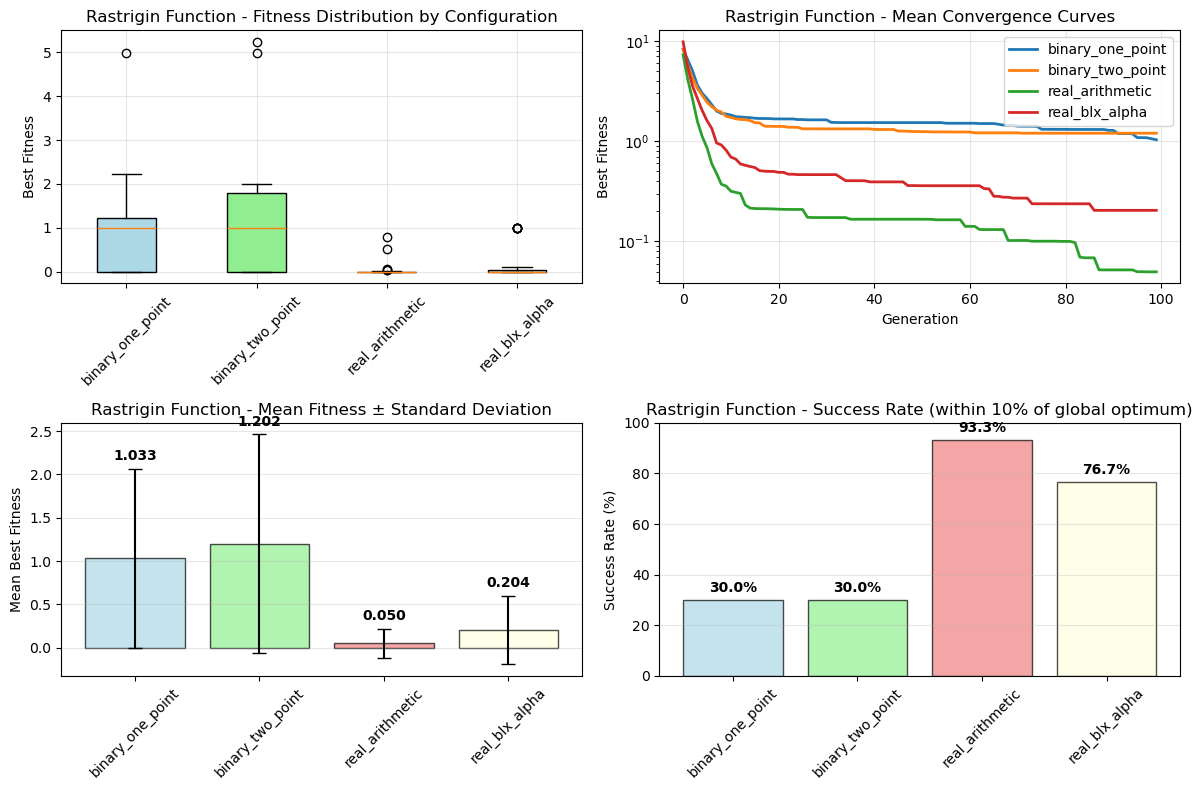

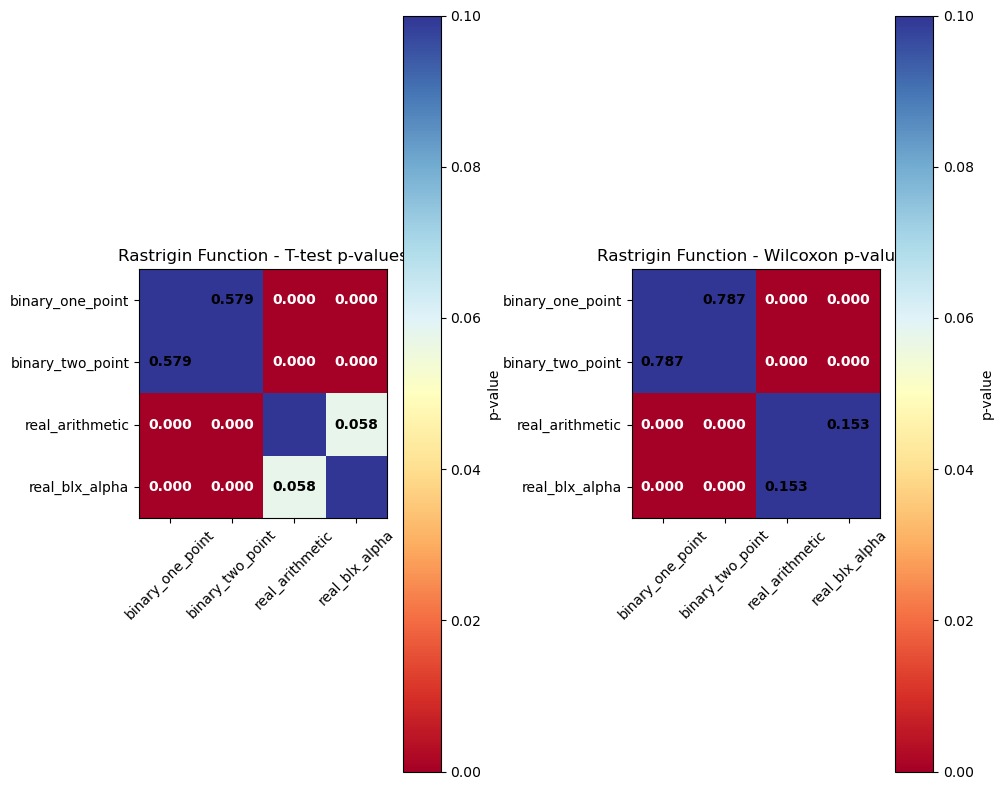

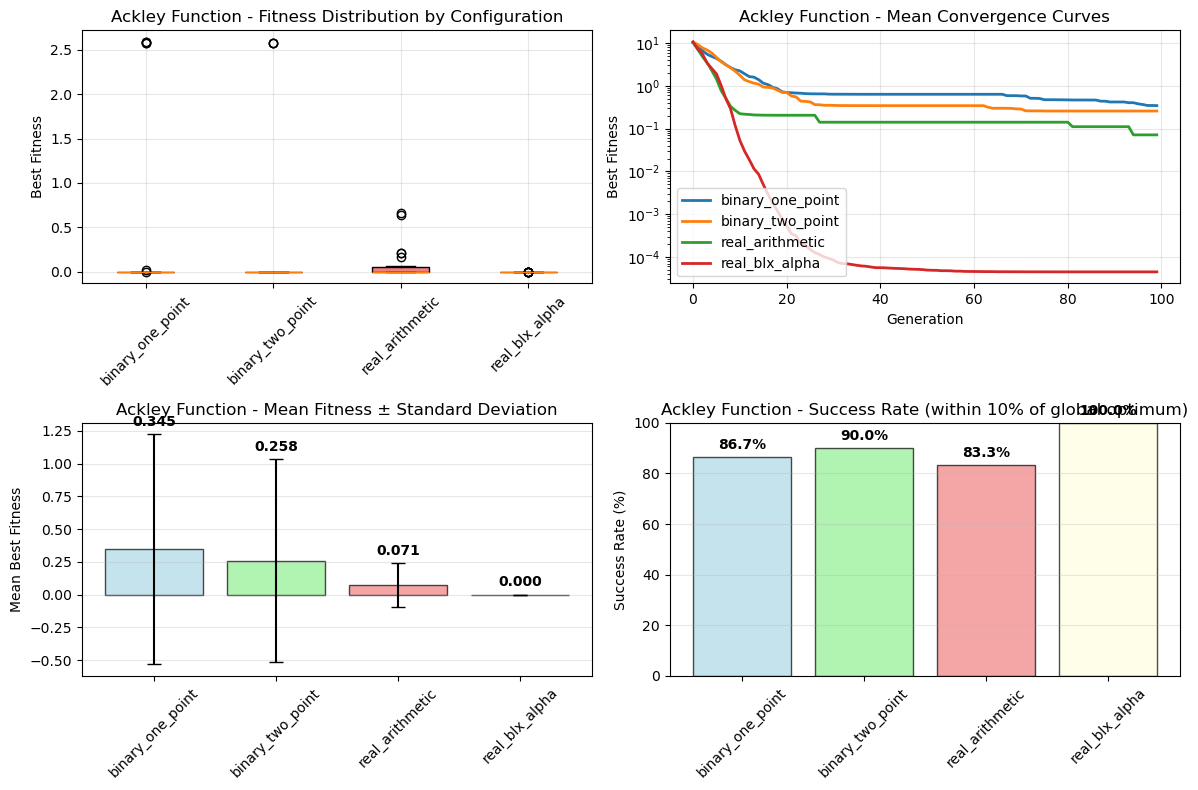

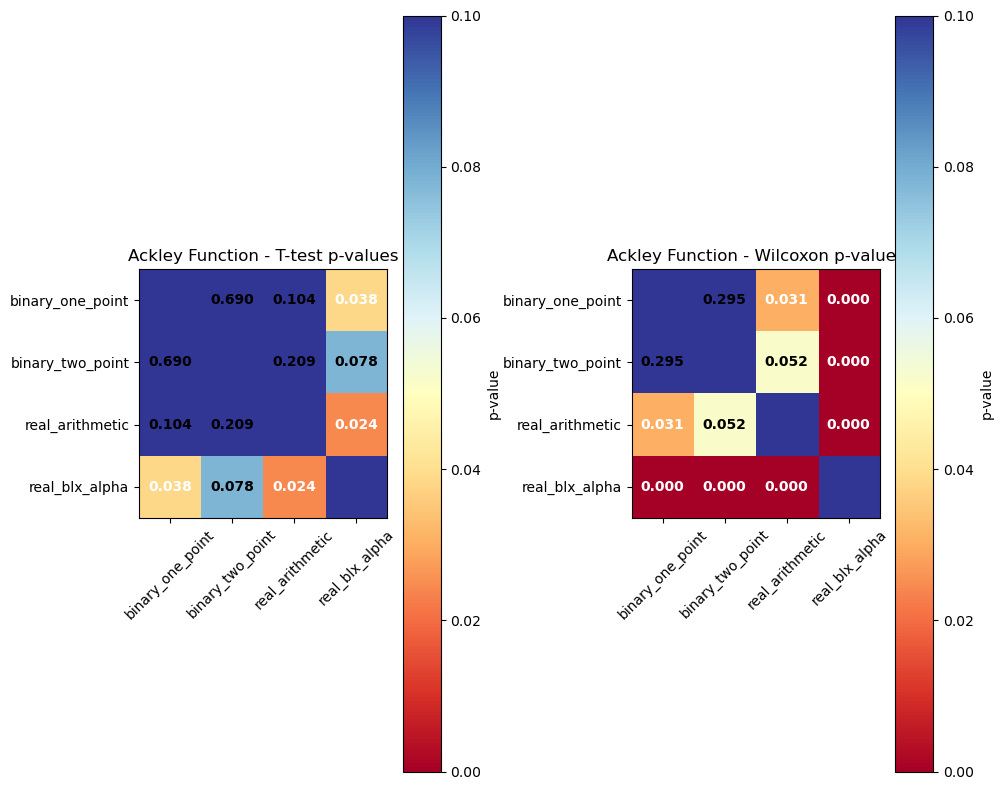

Generating summary tables...

Rastrigin Function - Summary Results:
   Configuration Best Fitness          Mean ± Std Success Rate (%)
Binary One Point     0.000000 1.032975 ± 1.034643             30.0
Binary Two Point     0.000000 1.202108 ± 1.260003             30.0
 Real Arithmetic     0.000000 0.049755 ± 0.167441             93.3
  Real Blx Alpha     0.000000 0.204384 ± 0.395803             76.7

Statistical Analysis Summary:
ANOVA F-statistic: 13.700847
ANOVA p-value: 0.000000
→ Significant differences detected between configurations

Best performing configuration: Real Arithmetic
Mean fitness: 0.049755
Standard deviation: 0.167441

Representation Comparison:
Binary representation average: 1.117541
Real-valued representation average: 0.127070
→ Real-valued representation performs better on average

Ackley Function - Summary Results:
   Configuration Best Fitness          Mean ± Std Success Rate (%)
Binary One Point     0.000125 0.345190 ± 0.877520             86.7
Binary Two Point

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from scipy import stats
import random
import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)
random.seed(42)

# 1. BENCHMARK FUNCTION IMPLEMENTATIONS

class BenchmarkFunctions:
    """
    Implementation of multimodal benchmark optimization functions.
    These functions are commonly used to test optimization algorithms.
    """
    
    @staticmethod
    def rastrigin(x, y):
        """
        Rastrigin function: f(x,y) = 20 + x² + y² - 10*cos(2πx) - 10*cos(2πy)
        Domain: [-5.12, 5.12] × [-5.12, 5.12]
        Global minimum: f(0,0) = 0
        
        This is a highly multimodal function with many local minima.
        """
        A = 10
        n = 2  # 2D function
        return A * n + (x**2 - A * np.cos(2 * np.pi * x)) + (y**2 - A * np.cos(2 * np.pi * y))
    
    @staticmethod
    def ackley(x, y):
        """
        Ackley function: f(x,y) = -20*exp(-0.2*sqrt(0.5*(x²+y²))) - exp(0.5*(cos(2πx)+cos(2πy))) + e + 20
        Domain: [-32.768, 32.768] × [-32.768, 32.768]
        Global minimum: f(0,0) = 0
        
        This function has many local minima but only one global minimum.
        """
        a = 20
        b = 0.2
        c = 2 * np.pi
        
        sum_sq_term = -a * np.exp(-b * np.sqrt(0.5 * (x**2 + y**2)))
        cos_term = -np.exp(0.5 * (np.cos(c * x) + np.cos(c * y)))
        
        return sum_sq_term + cos_term + a + np.exp(1)

# Initialize function objects
functions = BenchmarkFunctions()

# Define function domains and properties
FUNCTIONS = {
    'f1_rastrigin': {
        'func': functions.rastrigin,
        'domain': [(-5.12, 5.12), (-5.12, 5.12)],
        'global_min': (0, 0),
        'global_min_value': 0,
        'name': 'Rastrigin Function'
    },
    'f2_ackley': {
        'func': functions.ackley,
        'domain': [(-32.768, 32.768), (-32.768, 32.768)],
        'global_min': (0, 0),
        'global_min_value': 0,
        'name': 'Ackley Function'
    }
}

print("Benchmark functions implemented successfully!")
print(f"Function 1: {FUNCTIONS['f1_rastrigin']['name']}")
print(f"  Domain: {FUNCTIONS['f1_rastrigin']['domain']}")
print(f"  Global minimum: f{FUNCTIONS['f1_rastrigin']['global_min']} = {FUNCTIONS['f1_rastrigin']['global_min_value']}")
print()
print(f"Function 2: {FUNCTIONS['f2_ackley']['name']}")
print(f"  Domain: {FUNCTIONS['f2_ackley']['domain']}")
print(f"  Global minimum: f{FUNCTIONS['f2_ackley']['global_min']} = {FUNCTIONS['f2_ackley']['global_min_value']}")

# 2. FUNCTION VISUALIZATION

def visualize_function(func_info, func_key):
    """
    Create 2D contour and 3D surface plots for a given function.
    
    Parameters:
    - func_info: Dictionary containing function information
    - func_key: String key for the function
    """
    func = func_info['func']
    domain = func_info['domain']
    name = func_info['name']
    
    # Create meshgrid for plotting
    # Use appropriate resolution based on domain size
    if 'ackley' in func_key:
        # Ackley has larger domain, use coarser grid
        x = np.linspace(domain[0][0], domain[0][1], 100)
        y = np.linspace(domain[1][0], domain[1][1], 100)
    else:
        # Rastrigin has smaller domain, use finer grid
        x = np.linspace(domain[0][0], domain[0][1], 200)
        y = np.linspace(domain[1][0], domain[1][1], 200)
    
    X, Y = np.meshgrid(x, y)
    Z = func(X, Y)
    
    # Create figure with subplots
    fig = plt.figure(figsize=(15, 6))
    
    # 2D Contour Plot
    ax1 = fig.add_subplot(121)
    contour = ax1.contour(X, Y, Z, levels=20, alpha=0.7)
    ax1.contourf(X, Y, Z, levels=20, alpha=0.6, cmap='viridis')
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.set_title(f'{name} - 2D Contour Plot')
    ax1.grid(True, alpha=0.3)
    
    # Mark global minimum
    global_min = func_info['global_min']
    ax1.plot(global_min[0], global_min[1], 'r*', markersize=15, label='Global Minimum')
    ax1.legend()
    
    # Add colorbar
    plt.colorbar(contour, ax=ax1)
    
    # 3D Surface Plot
    ax2 = fig.add_subplot(122, projection='3d')
    surface = ax2.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8, antialiased=True)
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')
    ax2.set_zlabel('f(x,y)')
    ax2.set_title(f'{name} - 3D Surface Plot')
    
    # Mark global minimum in 3D
    ax2.scatter(global_min[0], global_min[1], func_info['global_min_value'], 
               color='red', s=100, label='Global Minimum')
    
    # Add colorbar
    fig.colorbar(surface, ax=ax2, shrink=0.5)
    
    plt.tight_layout()
    plt.show()

# Visualize both functions
print("Generating function visualizations...")
for func_key, func_info in FUNCTIONS.items():
    print(f"\nVisualizing {func_info['name']}:")
    visualize_function(func_info, func_key)

# 3. GENETIC ALGORITHM IMPLEMENTATION

class GeneticAlgorithm:
    """
    Flexible Genetic Algorithm implementation supporting:
    - Binary and real-valued representations
    - Multiple crossover operators
    - Configurable parameters
    """
    
    def __init__(self, objective_func, domain, representation='real', 
                 crossover_type='arithmetic', population_size=50, 
                 mutation_rate=0.01, crossover_rate=0.8, max_generations=100,
                 max_evaluations=5000):
        """
        Initialize the Genetic Algorithm.
        
        Parameters:
        - objective_func: Function to minimize
        - domain: List of tuples [(min_x, max_x), (min_y, max_y)]
        - representation: 'binary' or 'real'
        - crossover_type: 'one_point', 'two_point' (binary) or 'arithmetic', 'blx_alpha' (real)
        - population_size: Number of individuals in population
        - mutation_rate: Probability of mutation
        - crossover_rate: Probability of crossover
        - max_generations: Maximum number of generations
        - max_evaluations: Maximum number of function evaluations
        """
        self.objective_func = objective_func
        self.domain = domain
        self.representation = representation
        self.crossover_type = crossover_type
        self.population_size = population_size
        self.mutation_rate = mutation_rate
        self.crossover_rate = crossover_rate
        self.max_generations = max_generations
        self.max_evaluations = max_evaluations
        
        # Statistics tracking
        self.fitness_evaluations = 0
        self.best_fitness_history = []
        self.mean_fitness_history = []
        
        # Binary representation parameters
        self.bits_per_variable = 20  # Precision for binary encoding
        
        # BLX-alpha parameter
        self.alpha = 0.5
        
    def binary_to_real(self, binary_individual):
        """
        Convert binary representation to real values.
        
        Parameters:
        - binary_individual: List of binary strings
        
        Returns:
        - List of real values
        """
        real_values = []
        for i, binary_str in enumerate(binary_individual):
            # Convert binary string to integer
            decimal_value = int(binary_str, 2)
            # Map to domain range
            domain_min, domain_max = self.domain[i]
            max_decimal = 2**self.bits_per_variable - 1
            real_value = domain_min + (decimal_value / max_decimal) * (domain_max - domain_min)
            real_values.append(real_value)
        return real_values
    
    def real_to_binary(self, real_individual):
        """
        Convert real values to binary representation.
        
        Parameters:
        - real_individual: List of real values
        
        Returns:
        - List of binary strings
        """
        binary_individual = []
        for i, real_value in enumerate(real_individual):
            domain_min, domain_max = self.domain[i]
            # Normalize to [0, 1] range
            normalized = (real_value - domain_min) / (domain_max - domain_min)
            # Convert to integer in range [0, 2^bits_per_variable - 1]
            max_decimal = 2**self.bits_per_variable - 1
            decimal_value = int(normalized * max_decimal)
            # Convert to binary string
            binary_str = format(decimal_value, f'0{self.bits_per_variable}b')
            binary_individual.append(binary_str)
        return binary_individual
    
    def initialize_population(self):
        """
        Initialize the population based on representation type.
        
        Returns:
        - List of individuals
        """
        population = []
        
        if self.representation == 'binary':
            # Binary representation: each individual is a list of binary strings
            for _ in range(self.population_size):
                individual = []
                for domain_range in self.domain:
                    # Generate random binary string
                    binary_str = ''.join([str(random.randint(0, 1)) for _ in range(self.bits_per_variable)])
                    individual.append(binary_str)
                population.append(individual)
        
        else:  # real representation
            # Real-valued representation: each individual is a list of real numbers
            for _ in range(self.population_size):
                individual = []
                for domain_min, domain_max in self.domain:
                    value = random.uniform(domain_min, domain_max)
                    individual.append(value)
                population.append(individual)
        
        return population
    
    def evaluate_fitness(self, individual):
        """
        Evaluate fitness of an individual.
        
        Parameters:
        - individual: Individual to evaluate
        
        Returns:
        - Fitness value (lower is better for minimization)
        """
        self.fitness_evaluations += 1
        
        if self.representation == 'binary':
            # Convert binary to real values
            real_values = self.binary_to_real(individual)
        else:
            real_values = individual
        
        # Ensure values are within domain bounds
        for i, (domain_min, domain_max) in enumerate(self.domain):
            real_values[i] = max(domain_min, min(domain_max, real_values[i]))
        
        return self.objective_func(real_values[0], real_values[1])
    
    def tournament_selection(self, population, fitnesses, tournament_size=3):
        """
        Tournament selection method.
        
        Parameters:
        - population: Current population
        - fitnesses: List of fitness values
        - tournament_size: Size of tournament
        
        Returns:
        - Selected individual
        """
        # Select random individuals for tournament
        tournament_indices = random.sample(range(len(population)), tournament_size)
        tournament_fitnesses = [fitnesses[i] for i in tournament_indices]
        
        # Select best individual from tournament (minimum fitness)
        best_index = tournament_indices[np.argmin(tournament_fitnesses)]
        return population[best_index]
    
    def one_point_crossover(self, parent1, parent2):
        """
        One-point crossover for binary representation.
        
        Parameters:
        - parent1, parent2: Parent individuals (binary)
        
        Returns:
        - Two offspring
        """
        offspring1 = parent1.copy()
        offspring2 = parent2.copy()
        
        for i in range(len(parent1)):
            if random.random() < self.crossover_rate:
                # Choose random crossover point
                crossover_point = random.randint(1, len(parent1[i]) - 1)
                
                # Create offspring by swapping segments
                offspring1[i] = parent1[i][:crossover_point] + parent2[i][crossover_point:]
                offspring2[i] = parent2[i][:crossover_point] + parent1[i][crossover_point:]
        
        return offspring1, offspring2
    
    def two_point_crossover(self, parent1, parent2):
        """
        Two-point crossover for binary representation.
        
        Parameters:
        - parent1, parent2: Parent individuals (binary)
        
        Returns:
        - Two offspring
        """
        offspring1 = parent1.copy()
        offspring2 = parent2.copy()
        
        for i in range(len(parent1)):
            if random.random() < self.crossover_rate:
                # Choose two random crossover points
                length = len(parent1[i])
                point1 = random.randint(1, length - 2)
                point2 = random.randint(point1 + 1, length - 1)
                
                # Create offspring by swapping middle segment
                offspring1[i] = parent1[i][:point1] + parent2[i][point1:point2] + parent1[i][point2:]
                offspring2[i] = parent2[i][:point1] + parent1[i][point1:point2] + parent2[i][point2:]
        
        return offspring1, offspring2
    
    def arithmetic_crossover(self, parent1, parent2):
        """
        Arithmetic crossover for real-valued representation.
        
        Parameters:
        - parent1, parent2: Parent individuals (real-valued)
        
        Returns:
        - Two offspring
        """
        offspring1 = []
        offspring2 = []
        
        for i in range(len(parent1)):
            if random.random() < self.crossover_rate:
                # Random weight for arithmetic combination
                alpha = random.random()
                offspring1.append(alpha * parent1[i] + (1 - alpha) * parent2[i])
                offspring2.append((1 - alpha) * parent1[i] + alpha * parent2[i])
            else:
                offspring1.append(parent1[i])
                offspring2.append(parent2[i])
        
        return offspring1, offspring2
    
    def blx_alpha_crossover(self, parent1, parent2):
        """
        BLX-α crossover for real-valued representation.
        
        Parameters:
        - parent1, parent2: Parent individuals (real-valued)
        
        Returns:
        - Two offspring
        """
        offspring1 = []
        offspring2 = []
        
        for i in range(len(parent1)):
            if random.random() < self.crossover_rate:
                # Calculate interval bounds
                cmin = min(parent1[i], parent2[i])
                cmax = max(parent1[i], parent2[i])
                interval = cmax - cmin
                
                # Extend interval by alpha
                lower_bound = cmin - self.alpha * interval
                upper_bound = cmax + self.alpha * interval
                
                # Ensure bounds are within domain
                domain_min, domain_max = self.domain[i]
                lower_bound = max(lower_bound, domain_min)
                upper_bound = min(upper_bound, domain_max)
                
                # Generate offspring within extended interval
                offspring1.append(random.uniform(lower_bound, upper_bound))
                offspring2.append(random.uniform(lower_bound, upper_bound))
            else:
                offspring1.append(parent1[i])
                offspring2.append(parent2[i])
        
        return offspring1, offspring2
    
    def crossover(self, parent1, parent2):
        """
        Apply crossover based on representation and crossover type.
        
        Parameters:
        - parent1, parent2: Parent individuals
        
        Returns:
        - Two offspring
        """
        if self.representation == 'binary':
            if self.crossover_type == 'one_point':
                return self.one_point_crossover(parent1, parent2)
            elif self.crossover_type == 'two_point':
                return self.two_point_crossover(parent1, parent2)
        else:  # real representation
            if self.crossover_type == 'arithmetic':
                return self.arithmetic_crossover(parent1, parent2)
            elif self.crossover_type == 'blx_alpha':
                return self.blx_alpha_crossover(parent1, parent2)
        
        # Default: return parents if crossover type not recognized
        return parent1.copy(), parent2.copy()
    
    def mutate(self, individual):
        """
        Apply mutation based on representation type.
        
        Parameters:
        - individual: Individual to mutate
        
        Returns:
        - Mutated individual
        """
        mutated = individual.copy()
        
        if self.representation == 'binary':
            # Binary mutation: flip bits
            for i in range(len(mutated)):
                mutated_bits = list(mutated[i])
                for j in range(len(mutated_bits)):
                    if random.random() < self.mutation_rate:
                        # Flip bit
                        mutated_bits[j] = '1' if mutated_bits[j] == '0' else '0'
                mutated[i] = ''.join(mutated_bits)
        
        else:  # real representation
            # Gaussian mutation
            for i in range(len(mutated)):
                if random.random() < self.mutation_rate:
                    domain_min, domain_max = self.domain[i]
                    # Add Gaussian noise (10% of domain range as standard deviation)
                    std_dev = (domain_max - domain_min) * 0.1
                    noise = np.random.normal(0, std_dev)
                    mutated[i] = mutated[i] + noise
                    # Ensure within bounds
                    mutated[i] = max(domain_min, min(domain_max, mutated[i]))
        
        return mutated
    
    def optimize(self):
        """
        Run the genetic algorithm optimization.
        
        Returns:
        - Dictionary with optimization results
        """
        # Initialize population
        population = self.initialize_population()
        
        # Reset statistics
        self.fitness_evaluations = 0
        self.best_fitness_history = []
        self.mean_fitness_history = []
        
        best_individual = None
        best_fitness = float('inf')
        
        generation = 0
        
        # Main evolution loop
        while (generation < self.max_generations and 
               self.fitness_evaluations < self.max_evaluations):
            
            # Evaluate population
            fitnesses = [self.evaluate_fitness(individual) for individual in population]
            
            # Update best solution
            current_best_fitness = min(fitnesses)
            if current_best_fitness < best_fitness:
                best_fitness = current_best_fitness
                best_individual = population[fitnesses.index(current_best_fitness)].copy()
            
            # Record statistics
            self.best_fitness_history.append(best_fitness)
            self.mean_fitness_history.append(np.mean(fitnesses))
            
            # Check termination condition
            if self.fitness_evaluations >= self.max_evaluations:
                break
            
            # Create new population
            new_population = []
            
            # Elitism: keep best individual
            new_population.append(best_individual.copy())
            
            # Generate offspring
            while len(new_population) < self.population_size:
                # Selection
                parent1 = self.tournament_selection(population, fitnesses)
                parent2 = self.tournament_selection(population, fitnesses)
                
                # Crossover
                offspring1, offspring2 = self.crossover(parent1, parent2)
                
                # Mutation
                offspring1 = self.mutate(offspring1)
                offspring2 = self.mutate(offspring2)
                
                # Add to new population
                new_population.extend([offspring1, offspring2])
            
            # Trim population to correct size
            population = new_population[:self.population_size]
            generation += 1
        
        # Convert final best individual to real values for output
        if self.representation == 'binary':
            best_real_values = self.binary_to_real(best_individual)
        else:
            best_real_values = best_individual
        
        return {
            'best_solution': best_real_values,
            'best_fitness': best_fitness,
            'generations': generation,
            'evaluations': self.fitness_evaluations,
            'best_fitness_history': self.best_fitness_history,
            'mean_fitness_history': self.mean_fitness_history
        }

print("Genetic Algorithm implementation completed!")

# 4. EXPERIMENTAL SETUP AND EXECUTION

def run_experiments():
    """
    Run comprehensive experiments with all GA configurations.
    
    Returns:
    - Dictionary containing all experimental results
    """
    
    # Define experimental configurations
    representations = ['binary', 'real']
    crossover_types = {
        'binary': ['one_point', 'two_point'],
        'real': ['arithmetic', 'blx_alpha']
    }
    
    # GA parameters
    ga_params = {
        'population_size': 50,
        'mutation_rate': 0.01,
        'crossover_rate': 0.8,
        'max_generations': 100,
        'max_evaluations': 5000
    }
    
    # Number of independent runs per configuration
    num_runs = 30
    
    results = {}
    
    print("Starting comprehensive experiments...")
    print(f"Configurations per function: {len(representations) * (len(crossover_types['binary']) + len(crossover_types['real']))}")
    print(f"Runs per configuration: {num_runs}")
    print(f"Total runs per function: {4 * num_runs}")
    print()
    
    # Iterate through all functions
    for func_key, func_info in FUNCTIONS.items():
        print(f"Testing {func_info['name']}...")
        results[func_key] = {}
        
        # Iterate through all representations
        for representation in representations:
            # Get crossover types for current representation
            current_crossover_types = crossover_types[representation]
            
            for crossover_type in current_crossover_types:
                config_name = f"{representation}_{crossover_type}"
                print(f"  Configuration: {config_name}")
                
                # Store results for this configuration
                config_results = {
                    'best_fitnesses': [],
                    'best_solutions': [],
                    'convergence_histories': []
                }
                
                # Run multiple independent experiments
                for run in range(num_runs):
                    if (run + 1) % 10 == 0:
                        print(f"    Run {run + 1}/{num_runs}")
                    
                    # Create GA instance
                    ga = GeneticAlgorithm(
                        objective_func=func_info['func'],
                        domain=func_info['domain'],
                        representation=representation,
                        crossover_type=crossover_type,
                        **ga_params
                    )
                    
                    # Run optimization
                    result = ga.optimize()
                    
                    # Store results
                    config_results['best_fitnesses'].append(result['best_fitness'])
                    config_results['best_solutions'].append(result['best_solution'])
                    config_results['convergence_histories'].append(result['best_fitness_history'])
                
                # Calculate statistics
                config_results['mean_fitness'] = np.mean(config_results['best_fitnesses'])
                config_results['std_fitness'] = np.std(config_results['best_fitnesses'])
                config_results['min_fitness'] = np.min(config_results['best_fitnesses'])
                config_results['max_fitness'] = np.max(config_results['best_fitnesses'])
                
                results[func_key][config_name] = config_results
                
                print(f"    Results: Mean={config_results['mean_fitness']:.6f}, "
                      f"Std={config_results['std_fitness']:.6f}, "
                      f"Best={config_results['min_fitness']:.6f}")
    
    print("\n✓ All experiments completed!")
    return results

# Run the experiments
experimental_results = run_experiments()

# 5. STATISTICAL ANALYSIS

def perform_statistical_analysis(results):
    """
    Perform statistical tests to compare GA configurations.
    
    Parameters:
    - results: Dictionary containing experimental results
    
    Returns:
    - Dictionary containing statistical analysis results
    """
    
    statistical_results = {}
    
    print("📊 Performing statistical analysis...")
    
    for func_key, func_results in results.items():
        print(f"\nAnalyzing {FUNCTIONS[func_key]['name']}:")
        
        statistical_results[func_key] = {}
        
        # Extract configuration names and fitness data
        config_names = list(func_results.keys())
        fitness_data = {config: func_results[config]['best_fitnesses'] for config in config_names}
        
        # 1. Descriptive Statistics
        print("\n1. Descriptive Statistics:")
        stats_table = []
        for config in config_names:
            data = fitness_data[config]
            stats_table.append({
                'Configuration': config,
                'Mean': np.mean(data),
                'Std': np.std(data),
                'Min': np.min(data),
                'Max': np.max(data),
                'Median': np.median(data)
            })
        
        stats_df = pd.DataFrame(stats_table)
        print(stats_df.to_string(index=False, float_format='%.6f'))
        statistical_results[func_key]['descriptive_stats'] = stats_df
        
        # 2. Pairwise t-tests
        print("\n2. Pairwise t-test results (p-values):")
        n_configs = len(config_names)
        t_test_matrix = np.ones((n_configs, n_configs))
        
        for i in range(n_configs):
            for j in range(i+1, n_configs):
                # Perform two-sample t-test
                statistic, p_value = stats.ttest_ind(
                    fitness_data[config_names[i]], 
                    fitness_data[config_names[j]]
                )
                t_test_matrix[i, j] = p_value
                t_test_matrix[j, i] = p_value
        
        # Create DataFrame for t-test results
        t_test_df = pd.DataFrame(t_test_matrix, 
                                index=config_names, 
                                columns=config_names)
        print(t_test_df.to_string(float_format='%.4f'))
        statistical_results[func_key]['t_test_matrix'] = t_test_df
        
        # 3. One-way ANOVA
        print("\n3. One-way ANOVA:")
        fitness_groups = [fitness_data[config] for config in config_names]
        f_statistic, p_value_anova = stats.f_oneway(*fitness_groups)
        
        print(f"F-statistic: {f_statistic:.6f}")
        print(f"p-value: {p_value_anova:.6f}")
        
        if p_value_anova < 0.05:
            print("Result: Significant differences between configurations (p < 0.05)")
        else:
            print("Result: No significant differences between configurations (p >= 0.05)")
        
        statistical_results[func_key]['anova'] = {
            'f_statistic': f_statistic,
            'p_value': p_value_anova
        }
        
        # 4. Wilcoxon Rank-Sum Tests (non-parametric alternative)
        print("\n4. Wilcoxon rank-sum test results (p-values):")
        wilcoxon_matrix = np.ones((n_configs, n_configs))
        
        for i in range(n_configs):
            for j in range(i+1, n_configs):
                # Perform Wilcoxon rank-sum test
                try:
                    statistic, p_value = stats.mannwhitneyu(
                        fitness_data[config_names[i]], 
                        fitness_data[config_names[j]],
                        alternative='two-sided'
                    )
                    wilcoxon_matrix[i, j] = p_value
                    wilcoxon_matrix[j, i] = p_value
                except ValueError:
                    # Handle case where samples are identical
                    wilcoxon_matrix[i, j] = 1.0
                    wilcoxon_matrix[j, i] = 1.0
        
        wilcoxon_df = pd.DataFrame(wilcoxon_matrix, 
                                  index=config_names, 
                                  columns=config_names)
        print(wilcoxon_df.to_string(float_format='%.4f'))
        statistical_results[func_key]['wilcoxon_matrix'] = wilcoxon_df
    
    return statistical_results

# Perform statistical analysis
statistical_analysis = perform_statistical_analysis(experimental_results)

# 6. RESULTS VISUALIZATION

def plot_results(results, statistical_results):
    """
    Create comprehensive visualizations of experimental results.
    
    Parameters:
    - results: Dictionary containing experimental results
    - statistical_results: Dictionary containing statistical analysis
    """
    
    print("Generating result visualizations...")
    
    for func_key, func_results in results.items():
        func_name = FUNCTIONS[func_key]['name']
        
        # 1. Box plots comparing configurations
        plt.figure(figsize=(12, 8))
        
        config_names = list(func_results.keys())
        fitness_data = [func_results[config]['best_fitnesses'] for config in config_names]
        
        plt.subplot(2, 2, 1)
        box_plot = plt.boxplot(fitness_data, labels=config_names, patch_artist=True)
        colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow']
        for patch, color in zip(box_plot['boxes'], colors):
            patch.set_facecolor(color)
        
        plt.title(f'{func_name} - Fitness Distribution by Configuration')
        plt.ylabel('Best Fitness')
        plt.xticks(rotation=45)
        plt.grid(True, alpha=0.3)
        
        # 2. Convergence curves
        plt.subplot(2, 2, 2)
        for i, config in enumerate(config_names):
            convergence_histories = func_results[config]['convergence_histories']
            # Calculate mean convergence curve
            max_length = max(len(history) for history in convergence_histories)
            
            # Pad shorter histories with their last value
            padded_histories = []
            for history in convergence_histories:
                if len(history) < max_length:
                    padded_history = history + [history[-1]] * (max_length - len(history))
                else:
                    padded_history = history
                padded_histories.append(padded_history)
            
            mean_convergence = np.mean(padded_histories, axis=0)
            plt.plot(mean_convergence, label=config, linewidth=2)
        
        plt.title(f'{func_name} - Mean Convergence Curves')
        plt.xlabel('Generation')
        plt.ylabel('Best Fitness')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.yscale('log')  # Log scale for better visualization
        
        # 3. Bar plot of mean fitness with error bars
        plt.subplot(2, 2, 3)
        means = [func_results[config]['mean_fitness'] for config in config_names]
        stds = [func_results[config]['std_fitness'] for config in config_names]
        
        bars = plt.bar(range(len(config_names)), means, yerr=stds, capsize=5, 
                      color=colors, alpha=0.7, edgecolor='black')
        plt.title(f'{func_name} - Mean Fitness ± Standard Deviation')
        plt.ylabel('Mean Best Fitness')
        plt.xticks(range(len(config_names)), config_names, rotation=45)
        plt.grid(True, alpha=0.3, axis='y')
        
        # Add value labels on bars
        for i, (mean, std) in enumerate(zip(means, stds)):
            plt.text(i, mean + std + max(stds)*0.05, f'{mean:.3f}', 
                    ha='center', va='bottom', fontweight='bold')
        
        # 4. Success rate analysis (solutions within 10% of global optimum)
        plt.subplot(2, 2, 4)
        global_optimum = FUNCTIONS[func_key]['global_min_value']
        tolerance = abs(global_optimum) * 0.1 + 0.1  # 10% tolerance + small constant
        
        success_rates = []
        for config in config_names:
            best_fitnesses = func_results[config]['best_fitnesses']
            successful_runs = sum(1 for fitness in best_fitnesses if fitness <= global_optimum + tolerance)
            success_rate = successful_runs / len(best_fitnesses) * 100
            success_rates.append(success_rate)
        
        bars = plt.bar(range(len(config_names)), success_rates, color=colors, 
                      alpha=0.7, edgecolor='black')
        plt.title(f'{func_name} - Success Rate (within 10% of global optimum)')
        plt.ylabel('Success Rate (%)')
        plt.xticks(range(len(config_names)), config_names, rotation=45)
        plt.ylim(0, 100)
        plt.grid(True, alpha=0.3, axis='y')
        
        # Add percentage labels on bars
        for i, rate in enumerate(success_rates):
            plt.text(i, rate + 2, f'{rate:.1f}%', ha='center', va='bottom', fontweight='bold')
        
        plt.tight_layout()
        plt.show()
        
        # 5. Statistical significance heatmap
        plt.figure(figsize=(10, 8))
        
        # T-test p-values heatmap
        plt.subplot(1, 2, 1)
        t_test_matrix = statistical_results[func_key]['t_test_matrix'].values
        im1 = plt.imshow(t_test_matrix, cmap='RdYlBu', vmin=0, vmax=0.1)
        plt.title(f'{func_name} - T-test p-values')
        plt.xticks(range(len(config_names)), config_names, rotation=45)
        plt.yticks(range(len(config_names)), config_names)
        
        # Add text annotations
        for i in range(len(config_names)):
            for j in range(len(config_names)):
                if i != j:
                    color = 'white' if t_test_matrix[i, j] < 0.05 else 'black'
                    plt.text(j, i, f'{t_test_matrix[i, j]:.3f}', 
                            ha='center', va='center', color=color, fontweight='bold')
        
        plt.colorbar(im1, label='p-value')
        
        # Wilcoxon test p-values heatmap
        plt.subplot(1, 2, 2)
        wilcoxon_matrix = statistical_results[func_key]['wilcoxon_matrix'].values
        im2 = plt.imshow(wilcoxon_matrix, cmap='RdYlBu', vmin=0, vmax=0.1)
        plt.title(f'{func_name} - Wilcoxon p-values')
        plt.xticks(range(len(config_names)), config_names, rotation=45)
        plt.yticks(range(len(config_names)), config_names)
        
        # Add text annotations
        for i in range(len(config_names)):
            for j in range(len(config_names)):
                if i != j:
                    color = 'white' if wilcoxon_matrix[i, j] < 0.05 else 'black'
                    plt.text(j, i, f'{wilcoxon_matrix[i, j]:.3f}', 
                            ha='center', va='center', color=color, fontweight='bold')
        
        plt.colorbar(im2, label='p-value')
        
        plt.tight_layout()
        plt.show()

plot_results(experimental_results, statistical_analysis)

# 7. SUMMARY TABLES AND FINAL ANALYSIS

def generate_summary_tables(results, statistical_results):
    """
    Generate comprehensive summary tables for the report.
    
    Parameters:
    - results: Dictionary containing experimental results
    - statistical_results: Dictionary containing statistical analysis
    
    Returns:
    - Dictionary containing formatted summary tables
    """
    
    summary_tables = {}
    
    print("Generating summary tables...")
    
    for func_key, func_results in results.items():
        func_name = FUNCTIONS[func_key]['name']
        print(f"\n{func_name} - Summary Results:")
        print("=" * 60)
        
        # Main results table
        config_names = list(func_results.keys())
        
        summary_data = []
        for config in config_names:
            data = func_results[config]
            summary_data.append({
                'Configuration': config.replace('_', ' ').title(),
                'Best Fitness': f"{data['min_fitness']:.6f}",
                'Mean ± Std': f"{data['mean_fitness']:.6f} ± {data['std_fitness']:.6f}",
                'Success Rate (%)': f"{sum(1 for f in data['best_fitnesses'] if f <= FUNCTIONS[func_key]['global_min_value'] + 0.1) / len(data['best_fitnesses']) * 100:.1f}"
            })
        
        summary_df = pd.DataFrame(summary_data)
        print(summary_df.to_string(index=False))
        summary_tables[f'{func_key}_summary'] = summary_df
        
        # Statistical significance summary
        print(f"\nStatistical Analysis Summary:")
        print(f"ANOVA F-statistic: {statistical_results[func_key]['anova']['f_statistic']:.6f}")
        print(f"ANOVA p-value: {statistical_results[func_key]['anova']['p_value']:.6f}")
        
        if statistical_results[func_key]['anova']['p_value'] < 0.05:
            print("→ Significant differences detected between configurations")
        else:
            print("→ No significant differences detected between configurations")
        
        # Best performing configuration
        best_config = min(config_names, key=lambda x: func_results[x]['mean_fitness'])
        print(f"\nBest performing configuration: {best_config.replace('_', ' ').title()}")
        print(f"Mean fitness: {func_results[best_config]['mean_fitness']:.6f}")
        print(f"Standard deviation: {func_results[best_config]['std_fitness']:.6f}")
        
        # Representation comparison
        binary_configs = [c for c in config_names if c.startswith('binary')]
        real_configs = [c for c in config_names if c.startswith('real')]
        
        if binary_configs and real_configs:
            binary_mean = np.mean([func_results[c]['mean_fitness'] for c in binary_configs])
            real_mean = np.mean([func_results[c]['mean_fitness'] for c in real_configs])
            
            print(f"\nRepresentation Comparison:")
            print(f"Binary representation average: {binary_mean:.6f}")
            print(f"Real-valued representation average: {real_mean:.6f}")
            
            if binary_mean < real_mean:
                print("→ Binary representation performs better on average")
            else:
                print("→ Real-valued representation performs better on average")
    
    return summary_tables

# Generate summary tables
summary_tables = generate_summary_tables(experimental_results, statistical_analysis)

# 8. CONCLUSIONS AND RECOMMENDATIONS

def draw_conclusions(results, statistical_results):
    """
    Draw conclusions from the experimental results and provide recommendations.
    
    Parameters:
    - results: Dictionary containing experimental results
    - statistical_results: Dictionary containing statistical analysis
    """
    
    print("\n" + "="*80)
    print("CONCLUSIONS AND RECOMMENDATIONS")
    print("="*80)
    
    overall_conclusions = []
    
    for func_key, func_results in results.items():
        func_name = FUNCTIONS[func_key]['name']
        config_names = list(func_results.keys())
        
        print(f"\n{func_name}:")
        print("-" * 40)
        
        # Find best and worst configurations
        best_config = min(config_names, key=lambda x: func_results[x]['mean_fitness'])
        worst_config = max(config_names, key=lambda x: func_results[x]['mean_fitness'])
        
        best_mean = func_results[best_config]['mean_fitness']
        worst_mean = func_results[worst_config]['mean_fitness']
        
        improvement = ((worst_mean - best_mean) / worst_mean) * 100
        
        print(f"• Best configuration: {best_config.replace('_', ' ').title()}")
        print(f"  Mean fitness: {best_mean:.6f}")
        print(f"• Worst configuration: {worst_config.replace('_', ' ').title()}")
        print(f"  Mean fitness: {worst_mean:.6f}")
        print(f"• Performance improvement: {improvement:.1f}%")
        
        # Analyze representation performance
        binary_configs = [c for c in config_names if c.startswith('binary')]
        real_configs = [c for c in config_names if c.startswith('real')]
        
        binary_mean = np.mean([func_results[c]['mean_fitness'] for c in binary_configs])
        real_mean = np.mean([func_results[c]['mean_fitness'] for c in real_configs])
        
        if binary_mean < real_mean:
            better_repr = "binary"
            repr_improvement = ((real_mean - binary_mean) / real_mean) * 100
        else:
            better_repr = "real-valued"
            repr_improvement = ((binary_mean - real_mean) / binary_mean) * 100
        
        print(f"• Better representation: {better_repr} ({repr_improvement:.1f}% improvement)")
        
        # Statistical significance
        anova_p = statistical_results[func_key]['anova']['p_value']
        if anova_p < 0.05:
            print(f"• Statistical significance: Yes (p = {anova_p:.4f})")
        else:
            print(f"• Statistical significance: No (p = {anova_p:.4f})")
        
        overall_conclusions.append({
            'function': func_name,
            'best_config': best_config,
            'best_performance': best_mean,
            'improvement': improvement,
            'better_representation': better_repr,
            'statistically_significant': anova_p < 0.05
        })
    
    # Overall recommendations
    print(f"\n{'🔍 OVERALL ANALYSIS:'}")
    print("-" * 40)
    
    # Best representation overall
    binary_wins = sum(1 for c in overall_conclusions if c['better_representation'] == 'binary')
    real_wins = sum(1 for c in overall_conclusions if c['better_representation'] == 'real-valued')
    
    if binary_wins > real_wins:
        print("• Binary representation shows better performance overall")
    elif real_wins > binary_wins:
        print("• Real-valued representation shows better performance overall")
    else:
        print("• Both representations show comparable performance")
    
    # Configuration recommendations
    best_configs = [c['best_config'] for c in overall_conclusions]
    from collections import Counter
    config_counts = Counter(best_configs)
    most_common_config = config_counts.most_common(1)[0][0]
    
    print(f"• Most successful configuration: {most_common_config.replace('_', ' ').title()}")
    
    # Statistical significance
    significant_functions = sum(1 for c in overall_conclusions if c['statistically_significant'])
    print(f"• Functions with statistically significant differences: {significant_functions}/{len(overall_conclusions)}")
    
    print(f"\n{'RECOMMENDATIONS:'}")
    print("-" * 40)
    print("1. For practitioners:")
    print(f"   - Start with {most_common_config.replace('_', ' ').lower()} configuration")
    print("   - Consider function characteristics when choosing representation")
    print("   - Always run multiple independent trials for reliable results")
    print()
    print("2. For researchers:")
    print("   - Investigate hybrid approaches combining binary and real representations")
    print("   - Consider adaptive parameter control mechanisms")
    print("   - Explore advanced crossover operators for better performance")
    print()
    print("3. Implementation considerations:")
    print("   - Ensure sufficient population diversity")
    print("   - Monitor convergence to avoid premature termination")
    print("   - Use appropriate statistical tests for performance comparison")

# Draw final conclusions
draw_conclusions(experimental_results, statistical_analysis)